In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
# Load the dataset
data = pd.read_csv('dataset.csv')

In [45]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [46]:
data.drop(['school'], axis=1, inplace=True)

In [47]:
data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,4,0,11,11
1,F,17,U,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,2,9,11,11
2,F,15,U,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,6,12,13,12
3,F,15,U,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,0,14,14,14
4,F,16,U,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,0,11,13,13


In [48]:
columns = data.columns.values.tolist()
print(columns)

['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [49]:
le = LabelEncoder()

label_encoded = []
onehot_encoded = []

for col in data.columns:
    if data[col].dtype == 'object' or data[col].dtype.name == 'category':
        unique_vals = data[col].nunique()

        if unique_vals == 2:
            # Binary → Label Encode
            data[col] = le.fit_transform(data[col])
            label_encoded.append(col)
        elif unique_vals > 2:
            # Multi-class → One-hot Encode
            data = pd.get_dummies(data, columns=[col])
            onehot_encoded.append(col)

print(data.head())

   sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  studytime  \
0    0   18        1        0        0     4     4           2          2   
1    0   17        1        0        1     1     1           1          2   
2    0   15        1        1        1     1     1           1          2   
3    0   15        1        0        1     4     2           1          3   
4    0   16        1        0        1     3     3           1          2   

   failures  ...  Fjob_other  Fjob_services  Fjob_teacher  reason_course  \
0         0  ...       False          False          True           True   
1         0  ...        True          False         False           True   
2         0  ...        True          False         False          False   
3         0  ...       False           True         False          False   
4         0  ...        True          False         False          False   

   reason_home  reason_other  reason_reputation  guardian_father  \
0        Fal

In [50]:
X = data.drop(columns=['G3'])
y = data['G3']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [51]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

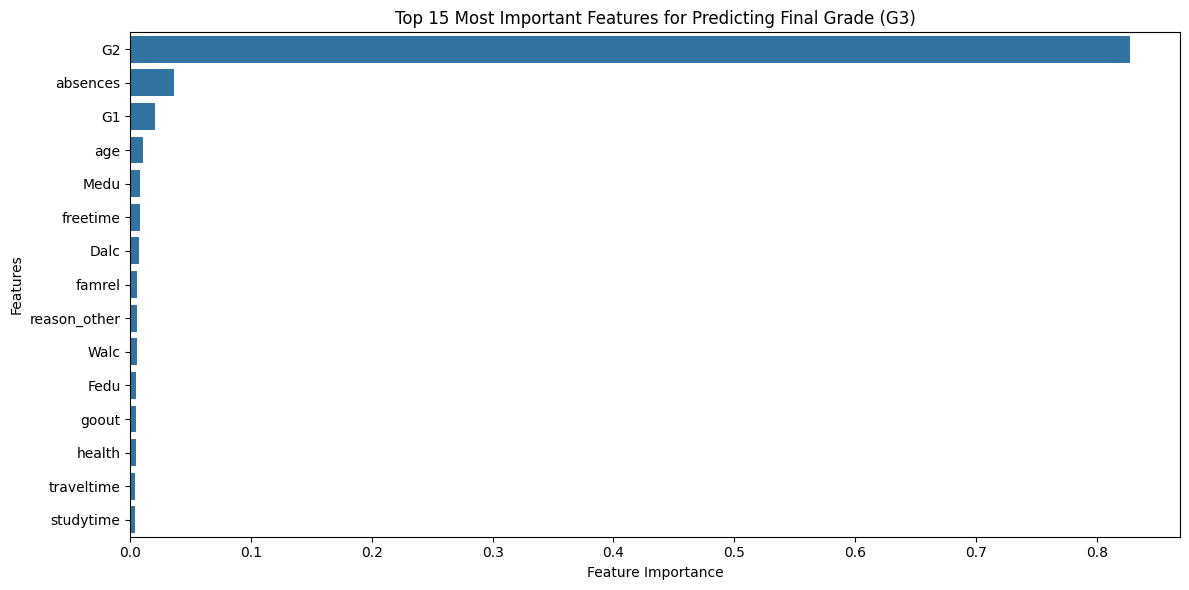

<Figure size 640x480 with 0 Axes>

Accuracy: 0.8401858389359481
Model R² Score: 0.840


In [52]:
accuracy = model.score(X_test, y_test)
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importance
plt.figure(figsize=(12, 6))
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
plt.title('Top 15 Most Important Features for Predicting Final Grade (G3)')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Plot relationships between important features and G3
plt.tight_layout()
plt.show()

# Print model accuracy
print(f'Accuracy: {accuracy}')
print(f'Model R² Score: {accuracy:.3f}')
